<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/TempSeries_aula1_analise_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pydataset pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939414 sha256=ba241087790fc7d9ae4b48e9a104d0c45a85ad885482c1bf7144806478211e9c
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [ ]:
import yfinance as yf
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import KPSSTest

In [ ]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  df = df.history(period='max')
  return df['Close']

id_name = 'ITSA4.SA'
df = get_yfinance(id_name)

In [ ]:
df

Date
2000-01-03 00:00:00-02:00    0.451355
2000-01-04 00:00:00-02:00    0.408261
2000-01-05 00:00:00-02:00    0.442283
2000-01-06 00:00:00-02:00    0.449087
2000-01-07 00:00:00-02:00    0.446819
                               ...   
2023-10-26 00:00:00-03:00    8.900000
2023-10-27 00:00:00-03:00    8.730000
2023-10-30 00:00:00-03:00    8.640000
2023-10-31 00:00:00-03:00    8.640000
2023-11-01 00:00:00-03:00    8.740000
Name: Close, Length: 5988, dtype: float64

<Axes: xlabel='Date'>

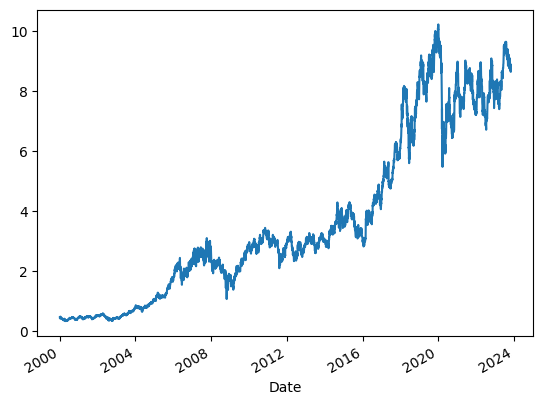

In [ ]:
df.plot()

In [ ]:
timeseries_titles = ['nottem', 'ambientNOxCH', 'acme',
                     'sunspot.year', 'UKDriverDeaths', 'USAccDeaths',
                     'UKgas', 'JohnsonJohnson', 'Nile',
                     'LakeHuron', 'austres', 'lynx',
                     'deaths', 'drivers']

df_air = data('AirPassengers')

In [ ]:
df_air

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


In [ ]:
data('AirPassengers', show_doc=True)

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

Formatação de datas

In [ ]:
df_air['date'] = pd.date_range(
    start='1949-01-01', end= '1961-01-01', freq='M'
  )
df_air.set_index('date', inplace=True)

In [ ]:
df_air.head(10)

,time,AirPassengers
date,,
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121
1949-06-30,1949.416667,135
1949-07-31,1949.500000,148
1949-08-31,1949.583333,148
1949-09-30,1949.666667,136


<Axes: xlabel='date'>

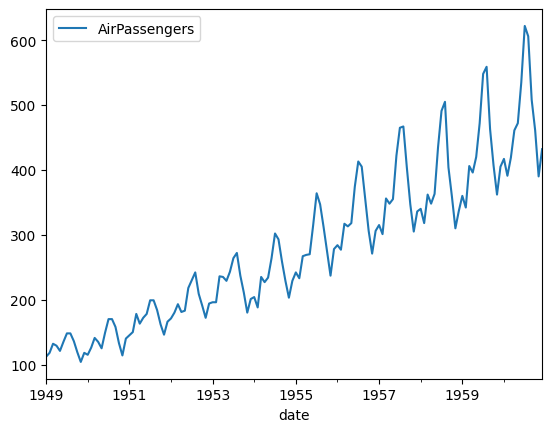

In [ ]:
df_air[['AirPassengers']].plot()

Definindo média móvel

In [ ]:
example_rm = [1, 2, 3, 4, 5, 6, 7, 8,9, 10]
rm_size = 2
for i in range(rm_size,len(example_rm)):
  print(f'Valores considerados: {example_rm[i-rm_size:i]}, RM: {sum(example_rm[i-rm_size:i])/rm_size}')

Valores considerados: [1, 2], RM: 1.5
Valores considerados: [2, 3], RM: 2.5
Valores considerados: [3, 4], RM: 3.5
Valores considerados: [4, 5], RM: 4.5
Valores considerados: [5, 6], RM: 5.5
Valores considerados: [6, 7], RM: 6.5
Valores considerados: [7, 8], RM: 7.5
Valores considerados: [8, 9], RM: 8.5


In [ ]:
def show_tendencia(ts, rm_size):
  df_show = pd.DataFrame()

  df_show['serie'] = ts.values[rm_size:]
  df_show['rm'] = ts.rolling(rm_size).mean().values[rm_size:]

  df_show['date'] = ts.index.to_list()[rm_size:]
  df_show.set_index('date', inplace=True)
  df_show.plot()
  plt.show()

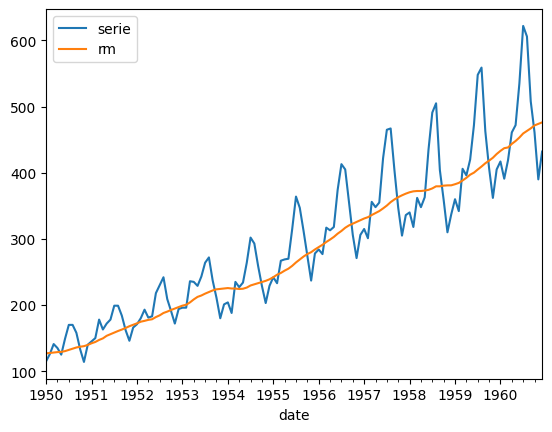

In [ ]:
ts = df_air['AirPassengers']
rm_size = 12
show_tendencia(ts, rm_size)

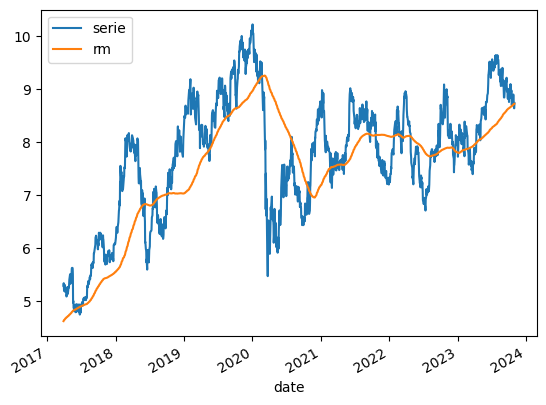

In [ ]:
ts = df
rm_size = 180
show_tendencia(ts.iloc[-(365*5):], rm_size)

Função de Autocorrelação (ACF) e Função de Autocorrelação Parcial (PACF)

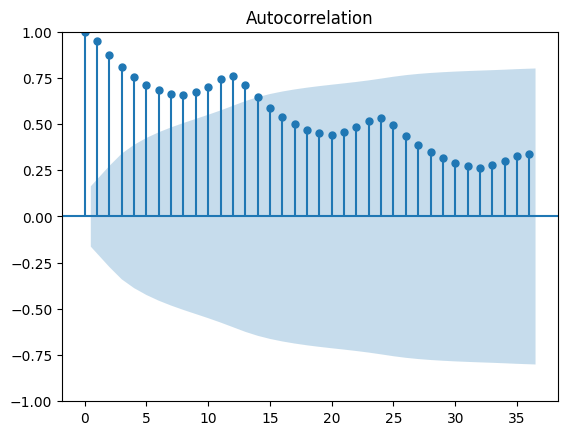

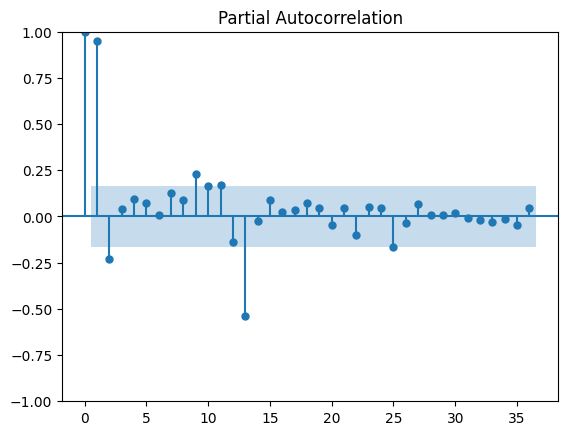

In [ ]:
ts = df_air['AirPassengers']
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

Pelo **ACF**, é possível notar uma **tendência** na série df_air e também uma **sazonalidade** a cada 12 lags (1 ano)

Lembrando que 'df' é o dataset do ITAUSA

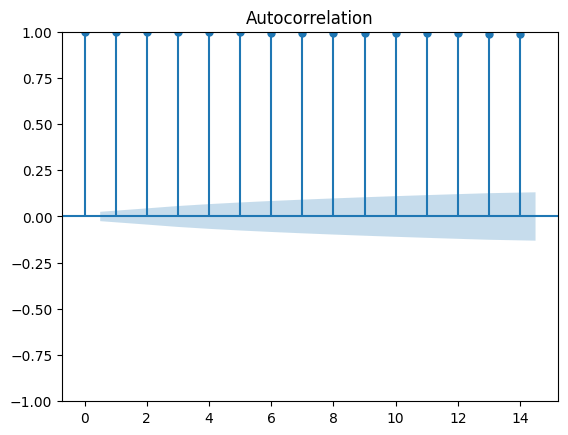

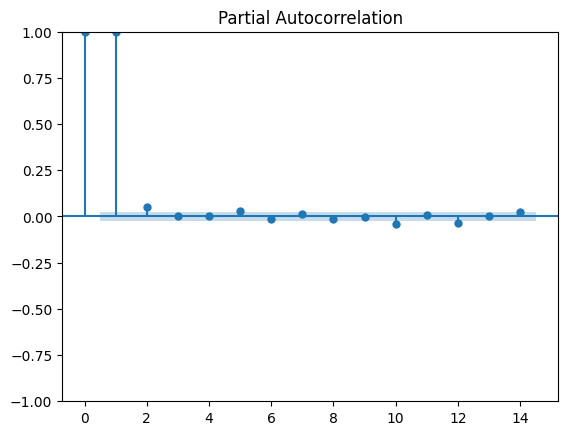

In [ ]:
ts = df
plot_acf(ts, lags=14)
plt.show()
plot_pacf(ts, lags=14)
plt.show()

Pelo **PACF** nota-se um **Random Walk** na série do ITAUSA

A escolha entre a Função de Autocorrelação **(ACF)** e a Função de Autocorrelação Parcial **(PACF)** depende do padrão específico que você está tentando identificar na série temporal.

ACF (Função de Autocorrelação):

* Útil para identificar padrões gerais de correlação em toda a série temporal, incluindo padrões sazonais e ciclos.
* Pode ajudar a identificar a presença de autocorrelações significativas em vários lags.
* Pode ser útil para identificar padrões mais amplos e variações periódicas na série temporal.

PACF (Função de Autocorrelação Parcial):

* Especialmente útil para identificar a ordem de um modelo autorregressivo (AR).
* Ajuda a isolar a correlação direta entre observações em lags específicos, removendo a influência de lags intermediários.
*Útil quando se está interessado especificamente na dependência temporal direta em determinados lags.

Em resumo, se você está interessado em entender a estrutura de dependência temporal em toda a série, a ACF pode ser mais informativa. Se o objetivo é identificar a ordem de um modelo AR específico, a PACF pode ser mais relevante.

Muitas vezes, uma abordagem combinada, onde você analisa tanto a ACF quanto a PACF, pode fornecer uma compreensão mais completa da estrutura temporal da série. Além disso, a escolha pode depender do contexto específico do problema e da natureza dos dados.

# AULA 2

Realizando teste de estacionariedade **KPSS**.

O teste KPSS é usado para verificar se uma série temporal é estacionária ao testar a hipótese nula de que a série é estacionária em torno de uma tendência determinística, especificamente, em torno de uma média móvel.

A estacionariedade em séries temporais é uma propriedade importante que implica que as propriedades estatísticas da série não mudam com o tempo. A série temporal estacionária é mais fácil de modelar e prever, o que a torna útil em análises de séries temporais.

In [ ]:
ts = df_air['AirPassengers']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.01, True)

O método 'shold_diff' avalia se a série temporal requer diferenciação para se tornar estacionária. Em outras palavras, ele testa se a série é estacionária em torno de uma tendência determinística. Se o valor retornado for *True*, isso sugere que a série não é estacionária e requer diferenciação para se tornar estacionária. Se o valor retornado for *False*, isso sugere que a série já é estacionária em torno de uma tendência determinística.

Função para diferenciação de uma série temporal

In [ ]:
def difference(ts, m = 1):
  diff = []

  for t in range(m,ts.shape[0]):
    value = ts[t] - ts[t-m]
    diff.append(value)

  return pd.Series(diff)

Realiza uma diferenciação da série temporal e compara duas abordagens diferentes: a diferenciação direta usando o método **diff** e a diferenciação usando a função **difference**.

<Axes: xlabel='date'>

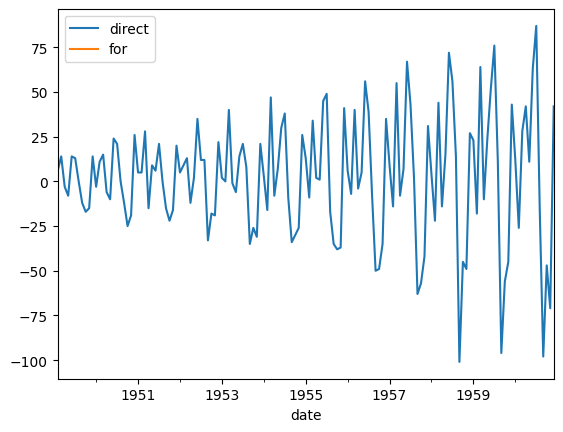

In [ ]:
df_diff  = pd.DataFrame()
df_diff['direct'] = ts.diff().iloc[1:] # O método iloc[1:] é usado para descartar o primeiro elemento,
                                       # pois a primeira diferença não pode ser calculada para o primeiro elemento.
diff = difference(ts, m = 1) # O argumento m é definido como 1, o que indica que você está calculando a primeira diferença
df_diff['for'] = diff
df_diff.plot()

Ambos os gráficos da diferenciação pelos dois métodos estão sobrepostos, mostrando que não há diferença entre eles.

A diferenciação é uma técnica comum em análise de séries temporais e é usada para tornar uma série temporal mais estacionária, facilitando a modelagem e a previsão. A escolha da abordagem de diferenciação depende do contexto e dos objetivos específicos da análise da série temporal.

Após a diferenciação na série AirPassagers, um novo teste KPSS é aplicado abaixo e observa-se a não necessidade de uma nova diferenciação.

In [ ]:
kpss = KPSSTest()
kpss.should_diff(diff)

(0.1, False)

Gráficos ACF e PACF antes da diferenciação:

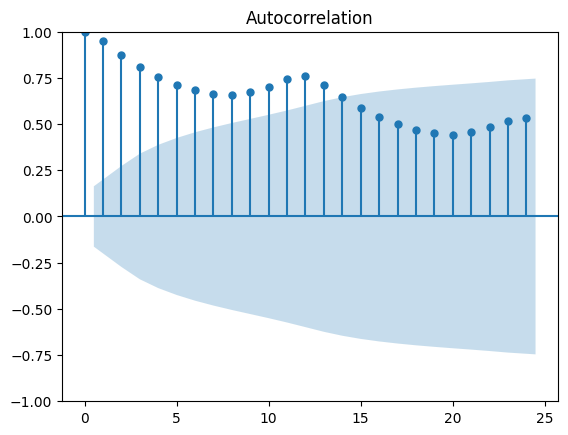

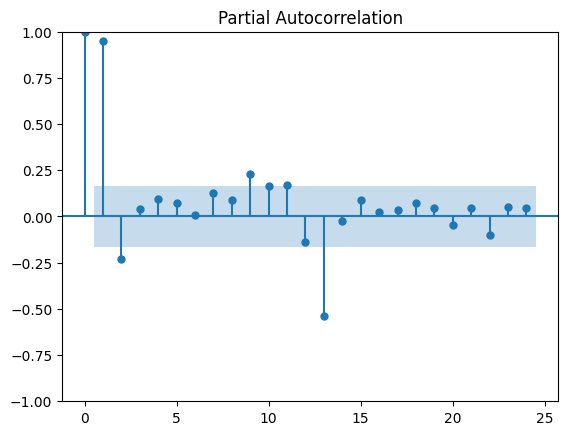

In [ ]:
df_to_plot = ts
plot_acf(df_to_plot, lags=24)
plt.show()
plot_pacf(df_to_plot, lags=24)
plt.show()

Gráficos ACF e PACF após a diferenciação:

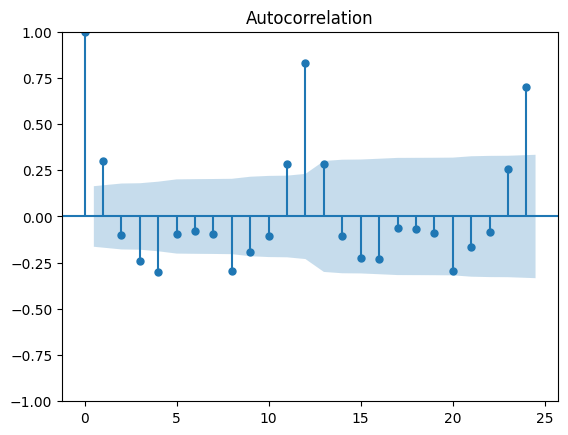

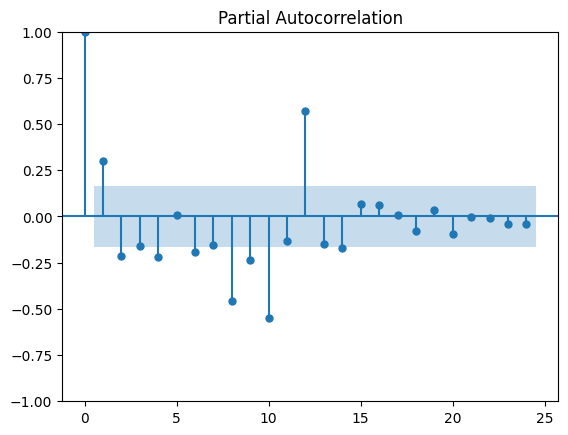

In [ ]:
df_to_plot = diff
plot_acf(df_to_plot, lags=24)
plt.show()
plot_pacf(df_to_plot, lags=24)
plt.show()

Observa-se que a tendência no gráfico ACF é eliminada.

Aplicação do teste KPSS para a série da ITAUSA (df)

In [ ]:
kpss = KPSSTest()
kpss.should_diff(df)

(0.01, True)

Aplicação da diferenciação no 'df'

In [ ]:
diff_itausa = difference(df, m = 1)

Novo teste KPSS após a diferenciação

In [ ]:
kpss = KPSSTest()
kpss.should_diff(diff_itausa)

(0.1, False)

Gráficos ACF e PACF antes da diferenciação:

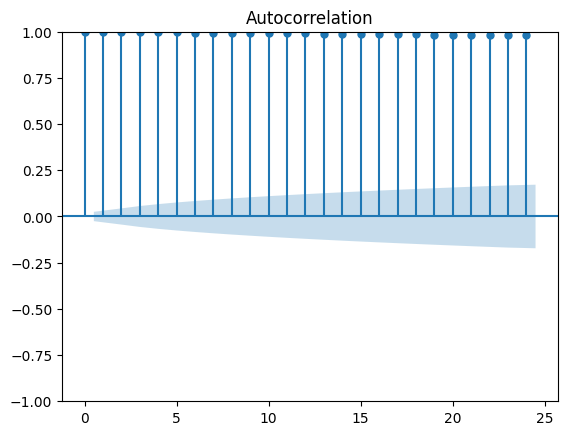

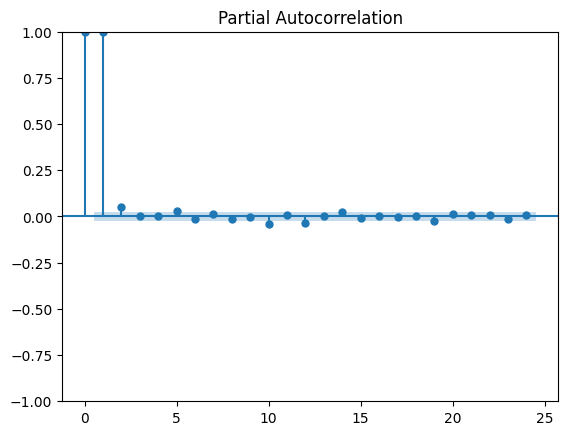

In [ ]:
df_to_plot = df
plot_acf(df_to_plot, lags=24)
plt.show()
plot_pacf(df_to_plot, lags=24)
plt.show()

Gráficos ACF e PACF após a diferenciação:

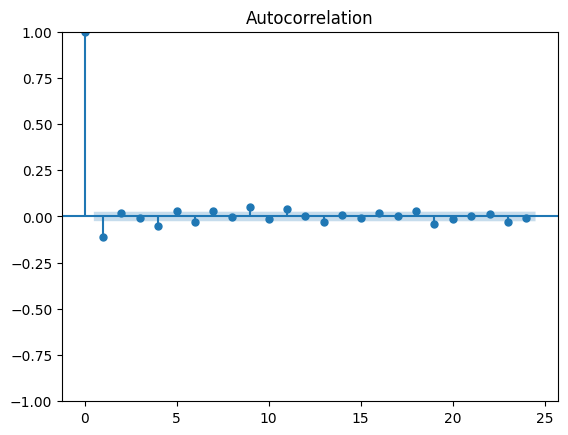

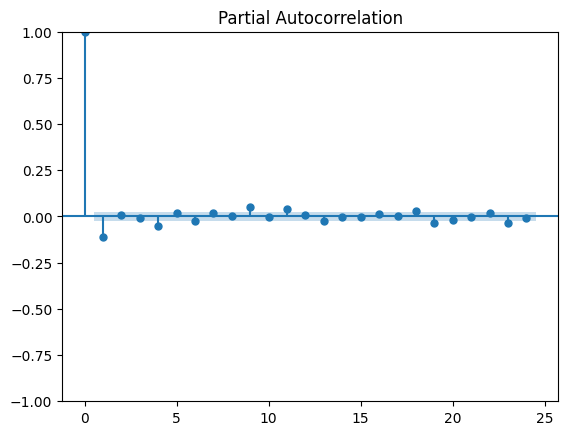

In [ ]:
df_to_plot = diff_itausa
plot_acf(df_to_plot, lags=24)
plt.show()
plot_pacf(df_to_plot, lags=24)
plt.show()

Pode-se observar um ruído branco em ambos os gráficos

Análise do 'df_lynx'

In [ ]:
df_lynx = pd.read_csv('./lynx.txt', header=None, names=['actual'])

<Axes: >

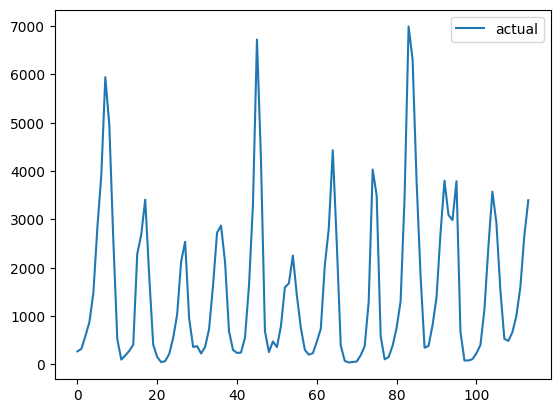

In [ ]:
df_lynx.plot()

Pelo teste KPSS, observa-se que é uma série estacionária e não requer diferenciação

In [ ]:
kpss = KPSSTest()
kpss.should_diff(df_lynx['actual'])

(0.1, False)

In [ ]:
df_lynx['actual'].shape

(114,)

Gráficos ACF e PACF:

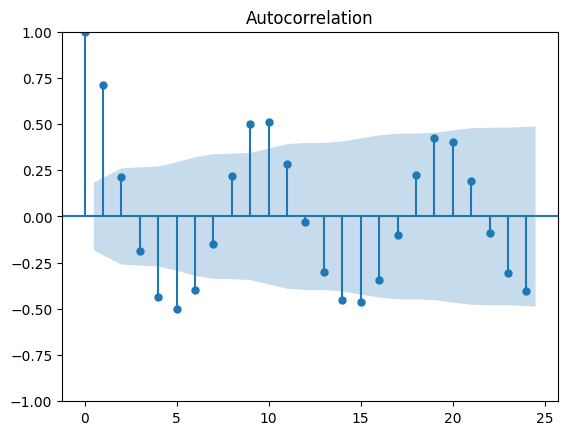

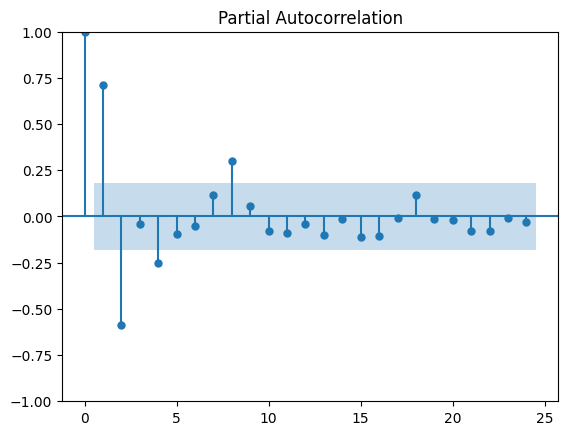

In [ ]:
df_to_plot = df_lynx['actual']
plot_acf(df_to_plot, lags=24)
plt.show()
plot_pacf(df_to_plot, lags=24)
plt.show()

É possível observar claramente uma sazonalidade principalmente no gráfico ACF.